<a href="https://colab.research.google.com/github/butchland/deeplearning-fastai-experiments/blob/master/course-v3-nbs/redux1_lesson1_mnist_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FastAI Course V3 (2019) Part 1 Lesson 1 Pets - Redux - MNIST Sample

### Objectives
Redo Lesson 1 with MNIST Sample

### Description
Use ResNET34 to quickly build a model for MNIST Sample to discriminate between images of  (3,7)

This is a redo of my FastAI exercises to get a better understanding
of the part 1 lessons.

## Summary of Results

#### mnist-sample-stage1-resnet34-fp32-lr1e2-bs4096-sz28-cycle3
```
Total time: 01:07

epoch  train_loss  valid_loss  accuracy  time
0      0.657888    0.915239    0.682041  00:27
1      0.380025    0.084927    0.971541  00:20
2      0.261894    0.029077    0.991168  00:20
----```


** Discussion** : Shockingly rapid convergence - accuracy climbs up quickly to to 97.15 % by the second epoch and reaches 99.11 % by the 3rd. One possible factor for this quick convergence is the max LR rate set at _1e-2_, higher than the default _1e-3_ set by the _fastai_ library. 

Whether the model has saturated at this point  seems to be contra-indicated by
the fact that train_loss and valid losses  are still decreasing and accuracy is still increasing.

Another indicator might be that even the LR Finder results run _before_ the training hasn't found the lowest losses even for pretty high LR rates (0.1). 

Nevertheless, to establish a quick baseline,  the next model unfreezes the layers and sets the LR rates based on the LR Finder results.

#### mnist-sample-stage2-resnet34-fp32-lrs1e6s8e4-bs4096-sz28-cycle2
```
Total time: 00:41

epoch  train_loss  valid_loss  accuracy  time
0      0.041392    0.029513    0.990677  00:20
1      0.037109    0.022525    0.993621  00:20
----```


**Discussion** : This time, the increase is not so dramatic, from _99.12 %_ to _99.36 %_,  with the train loss and valid loss still dropping, the accuracy still increasing. 

It also seems to indicate **underfitting** as the train loss is higher than the valid loss.

This seems to indicate that further improvements could be made to model by running more epochs.

But rather than do that,  we rewind the model back to the previous stage 1 model and continue training it to see if we can further optimize the model.

#### mnist-sample-stage1a-resnet34-fp32-lr5e4-bs4096-sz28-cycle3
```
Total time: 01:03

epoch  train_loss  valid_loss  accuracy  time
0      0.028836    0.023214    0.993621  00:20
1      0.020152    0.003635    0.998528  00:21
2      0.014730    0.003127    0.999019  00:21
----```


**Discussion** :  It looks like further training on the stage 1 model yielded an even better result than unfreezing (improving the accuracy from _99.11 %_ to _99.90 %_  vs. only _99.36 %_ for unfrozen model)  

Based on the results of the LR finder, it now has found LR rates which can cause the model to diverge and the loss to increase.

Also, as the train and validation loss continue to decrease  and the accuracy still increases, I believe that the model can still be further optimized without unfreezing. 

Another indication is that the train loss is still higher than valid loss, which might continue to indicate underfitting.

So on the basis of this,  we continue to train the model **without unfreezing**  it.


#### mnist-sample-stage1b-resnet34-fp32-lr3e5-bs4096-sz28-cycle3
```
Total time: 01:03

epoch  train_loss  valid_loss  accuracy  time
0      0.005326    0.003133    0.999019  00:21
1      0.004503    0.003277    0.998528  00:21
2      0.004208    0.003257    0.999019  00:21
----```


**Discussion** : At this point, the model's accuracy has not improved, but the valid loss and train loss are still dropping, but at a slower pace.

The train loss is still higher than the valid loss, which still indicates some underfitting.

Nevertheless, since the accuracy is no longer improving, we decide that unfreezing the model might now yield better results.

Continuing with this model (with highest train and valid loss so far), 
we unfreeze the model and run the LR finder.

#### mnist-sample-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle6
```
Total time: 02:07

epoch  train_loss  valid_loss  accuracy  time
0      0.004066    0.003105    0.999509  00:20
1      0.003642    0.002926    0.999509  00:20
2      0.003391    0.002949    0.999019  00:21
3      0.003323    0.003011    0.999509  00:21
4      0.002990    0.003134    0.999509  00:21
5      0.003003    0.003365    0.999509  00:21
----```


**Discussion**:  The model has approached its highest accuracy yet at __99.95%__ with the valid loss at its lowest after the 2nd epoch, and the training loss at its lowest at the 5th epoch. 

At this point, we decided to rewind back to the previous model, unfreeze it and then run it for fewer epochs.

#### mnist-sample-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle3
```
Total time: 01:01

epoch  train_loss  valid_loss  accuracy  time
0      0.004830    0.003118    0.999509  00:19
1      0.004335    0.002935    0.999509  00:20
2      0.004078    0.003007    0.999019  00:20
----```


**Discussion**:  Again, the highest accuracy reached was _99.95 %_ but this time, the last epoch dropped the accuracy. 

Despite this, the train loss was still dropping, but the valid loss was starting to increase.

We decide to rewind back again to the previous model

#### mnist-sample-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle2
```
Total time: 00:41

epoch  train_loss  valid_loss  accuracy  time
0      0.003284    0.003093    0.999509  00:21
1      0.003051    0.002939    0.999509  00:20
----```

** Final Conclusion**:  This is the highest accuracy we have achieved: __99.95 %__  with just finetuning on the learning rates and epochs.  



## Further Ideas for Exploration

- Reduce weight decay to see if reducing regularization might achieve higher accuracy results.

- Review misclassified results of final model to visually inspect where it is going wrong and maybe add data augmentation or additional training data to see if it can be better at the fine-grained classification.


## Standard Preamble

### Install fastai library and setup standard directories for Colab

In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0     57      0  0:00:05  0:00:05 --:--:--    78
Updating fastai...
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


### Load standard magics

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Connect to Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

### Import FastAI Libraries

### Load utilities

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
__version__

'1.0.50.post1'

In [0]:
escdrive = lambda x : x.as_posix().replace(' ','\ ')
gdrive = Path('/content/gdrive/My Drive/fastai_v3')
data_path = Config.data_path()
model_path = Config.model_path()

## Set train config


In [0]:
tfms = get_transforms(do_flip=False, max_rotate=0.) # for mnist, no flipping and no rotation
metrics = accuracy



## Load Data


In [0]:
dataset = 'mnist-sample'
data_url = URLs.MNIST_SAMPLE
download_path = untar_data(data_url)



## Show Data files


In [0]:
download_path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

In [0]:
path = download_path; path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

In [0]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_sample/train/3'),
 PosixPath('/root/.fastai/data/mnist_sample/train/7')]

## Build Databunch


In [0]:
src = (ImageList.from_folder(path)
       .split_by_folder()
       .label_from_folder())

### Load Data and View Data

In [0]:
fnames = get_image_files(path, recurse=True)

In [0]:
len(fnames)

14434

In [0]:
fnames[0]

PosixPath('/root/.fastai/data/mnist_sample/train/3/19280.png')

In [0]:
f1 = open_image(fnames[0])

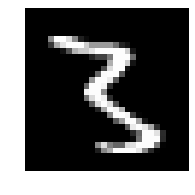

In [0]:
f1.show()

In [0]:
f1.shape

torch.Size([3, 28, 28])

## Set batch and imgsize 


In [0]:
img_size = 28
batch_size = 4096


## Create databunch


In [0]:
data = (src
        .transform(tfms=tfms, size=img_size)
        .databunch(bs=batch_size)
        .normalize(imagenet_stats))

       


## Create Learner


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=metrics)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 88443801.26it/s]


# Run Stage 1

## Run LR Finder


In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


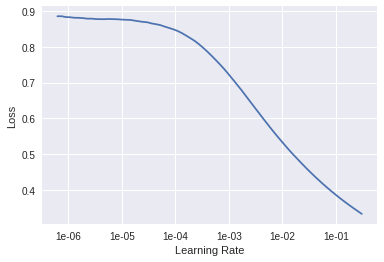

In [0]:
learn.recorder.plot()



## Train Stage 1


In [0]:
max_lr = 1e-2
epochs = 3
model_name = dataset + '-stage1-resnet34-fp32-lr1e2-bs4096-sz28-cycle3'


In [0]:
learn.fit_one_cycle(epochs, max_lr=max_lr)



epoch,train_loss,valid_loss,accuracy,time
0,0.657888,0.915239,0.682041,00:27
1,0.380025,0.084927,0.971541,00:20
2,0.261894,0.029077,0.991168,00:20


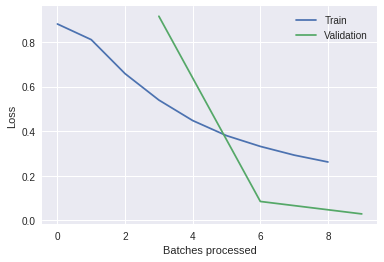

In [0]:
learn.recorder.plot_losses()

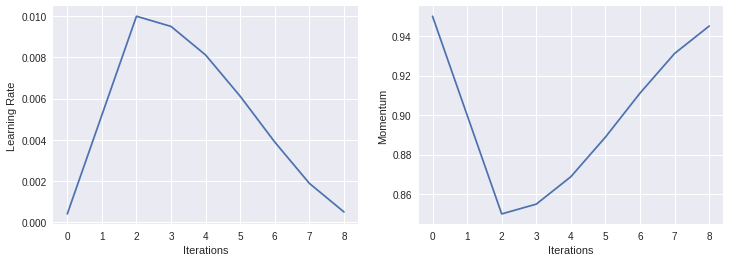

In [0]:
learn.recorder.plot_lr(show_moms=True)

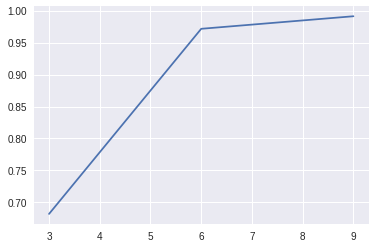

In [0]:
learn.recorder.plot_metrics()

## Interpret Training Results


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


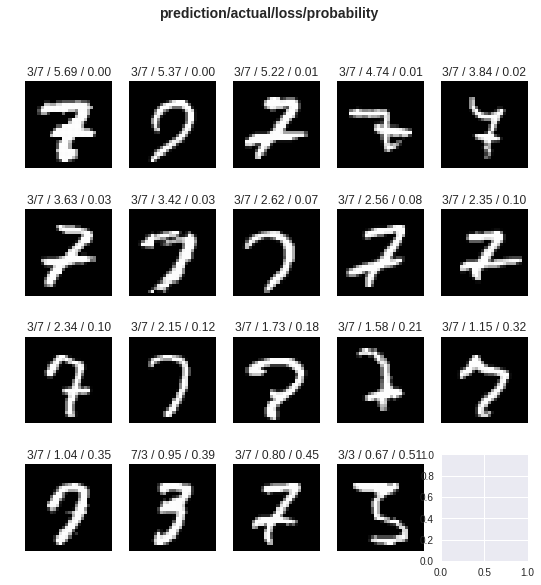

In [0]:
interp.plot_top_losses(19, figsize=(9,9),heatmap=True)


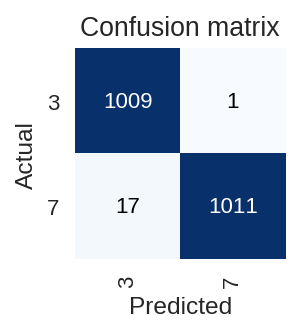

In [0]:
interp.plot_confusion_matrix(figsize=(2,2),dpi=160)


In [0]:
interp.most_confused(min_val=2)



[('7', '3', 17)]

## Backup Stage 1 Model


In [0]:
learn.save(model_name)


# Run Stage 2

## Unfreeze


In [0]:
learn.unfreeze()


## Rerun LR Finder


In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


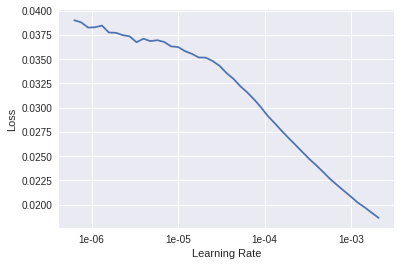

In [0]:
learn.recorder.plot()


## Train Stage 2


In [0]:
epochs = 2
max_lr = slice(1e-6,8e-4)

model_name = dataset + '-stage2-resnet34-fp32-lrs1e6s8e4-bs4096-sz28-cycle2'


In [0]:
learn.fit_one_cycle(epochs, max_lr=max_lr)


epoch,train_loss,valid_loss,accuracy,time
0,0.041392,0.029513,0.990677,00:20
1,0.037109,0.022525,0.993621,00:20


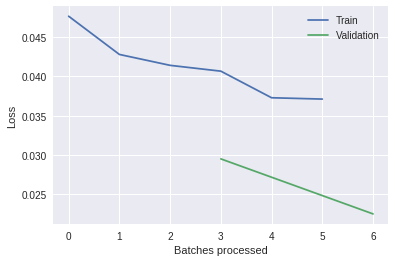

In [0]:
learn.recorder.plot_losses()

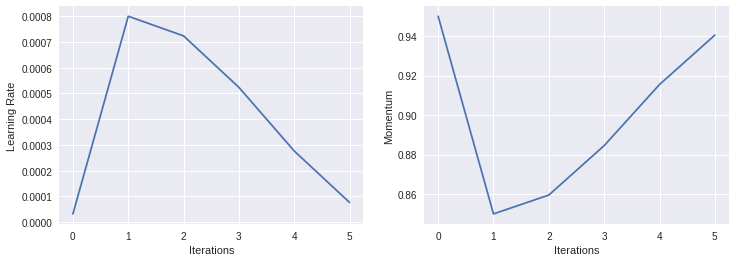

In [0]:
learn.recorder.plot_lr(show_moms=True)

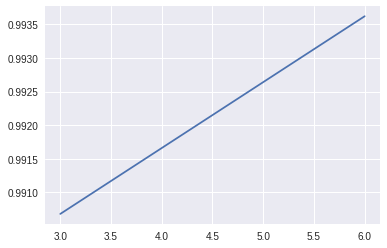

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save(model_name)


In [0]:
learn.export(model_name + '.pkl')


# Rerun Stage 1
Rerun Stage 1 and optimize stage1 (frozen) model until model reaches saturation point

In [0]:
### Reload initial stage 1 model
Reload so that it can be optimized further

In [0]:
stage1_model = dataset + '-stage1-resnet34-fp32-lr1e2-bs4096-sz28-cycle3'

In [0]:
learn.load(stage1_model);

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


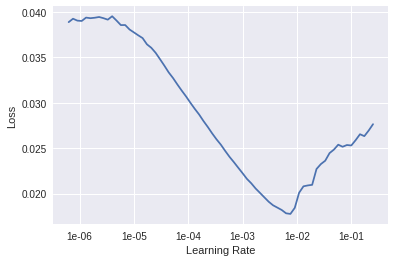

In [0]:
learn.recorder.plot()

In [0]:
max_lr = 5e-4
epochs = 3
model_name = dataset + '-stage1a-resnet34-fp32-lr5e4-bs4096-sz28-cycle3'


In [0]:
learn.fit_one_cycle(epochs, max_lr=max_lr)



epoch,train_loss,valid_loss,accuracy,time
0,0.028836,0.023214,0.993621,00:20
1,0.020152,0.003635,0.998528,00:21
2,0.014730,0.003127,0.999019,00:21


In [0]:
learn.save(model_name)

In [0]:
learn.export(model_name + '.pkl')

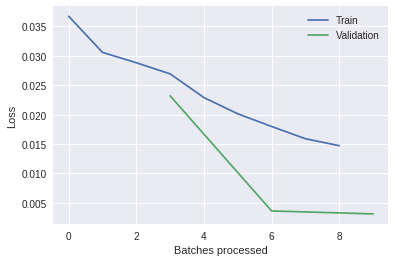

In [0]:
learn.recorder.plot_losses()

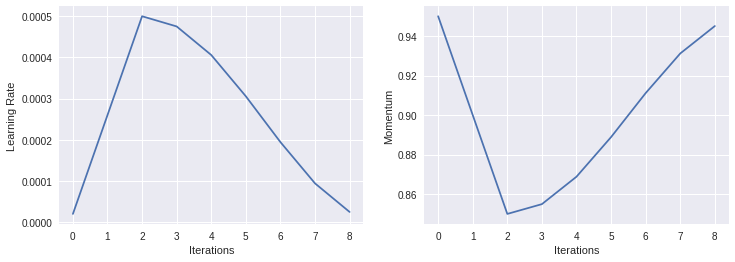

In [0]:
learn.recorder.plot_lr(show_moms=True)

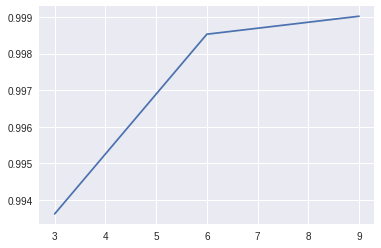

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


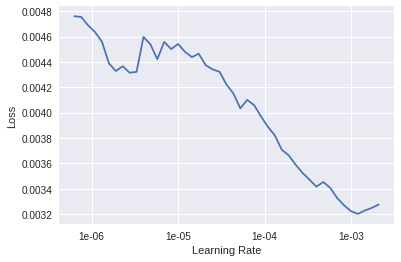

In [0]:
learn.recorder.plot()

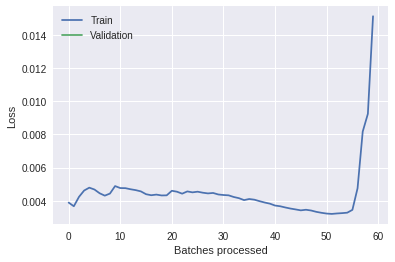

In [0]:
learn.recorder.plot_losses()

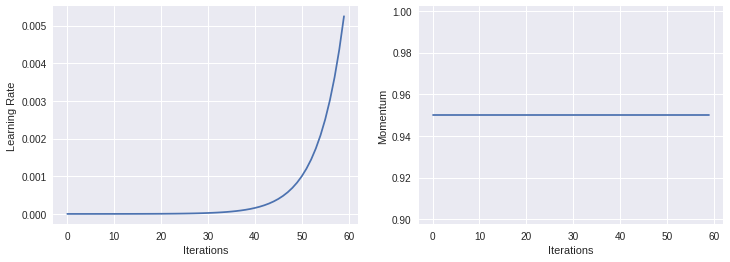

In [0]:
learn.recorder.plot_lr(show_moms=True)

In [0]:
max_lr = 3e-5
epochs = 3
model_name = dataset + '-stage1b-resnet34-fp32-lr3e5-bs4096-sz28-cycle3'


In [0]:
learn.fit_one_cycle(epochs, max_lr=max_lr)



epoch,train_loss,valid_loss,accuracy,time
0,0.005326,0.003133,0.999019,00:21
1,0.004503,0.003277,0.998528,00:21
2,0.004208,0.003257,0.999019,00:21


In [0]:
learn.save(model_name)

In [0]:
learn.export(model_name + '.pkl')

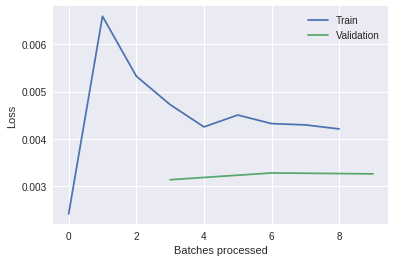

In [0]:
learn.recorder.plot_losses()

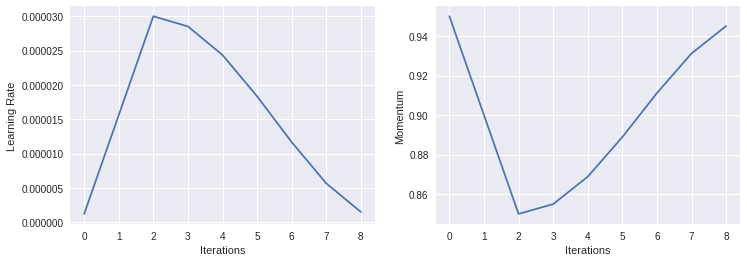

In [0]:
learn.recorder.plot_lr(show_moms=True)

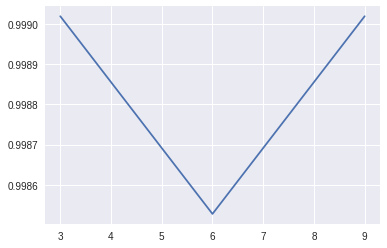

In [0]:
learn.recorder.plot_metrics()

#  Rerun Stage 2

## Unfreeze


In [0]:
learn.load(model_name);

In [0]:
learn.unfreeze()


## Rerun LR Finder


In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


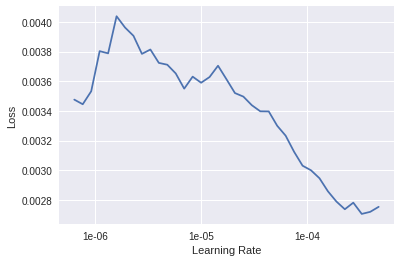

In [0]:
learn.recorder.plot()

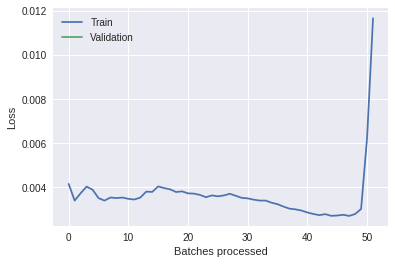

In [0]:
learn.recorder.plot_losses()

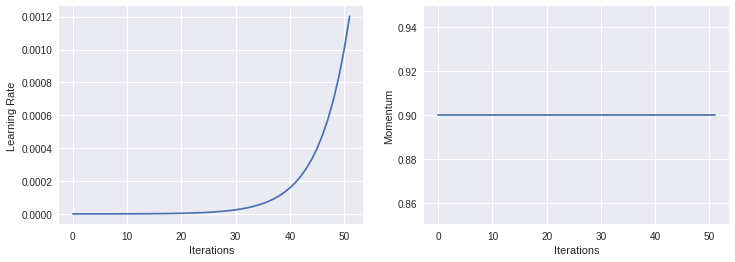

In [0]:
learn.recorder.plot_lr(show_moms=True)

## Train Stage 2


In [0]:
stage1_model_name = dataset + '-stage1b-resnet34-fp32-lr3e5-bs4096-sz28-cycle3'
learn.load(stage1_model_name)

In [0]:
epochs = 6
max_lr = slice(1e-6,3e-5)

model_name = dataset + '-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle6'


In [0]:
learn.fit_one_cycle(epochs, max_lr=max_lr)


epoch,train_loss,valid_loss,accuracy,time
0,0.004066,0.003105,0.999509,00:20
1,0.003642,0.002926,0.999509,00:20
2,0.003391,0.002949,0.999019,00:21
3,0.003323,0.003011,0.999509,00:21
4,0.002990,0.003134,0.999509,00:21
5,0.003003,0.003365,0.999509,00:21


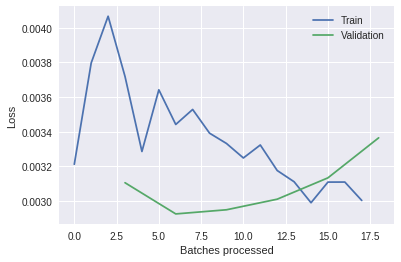

In [0]:
learn.recorder.plot_losses()

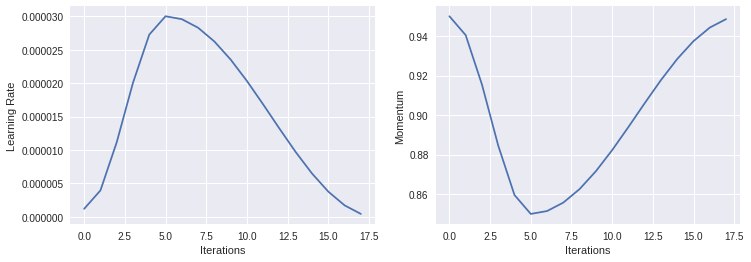

In [0]:
learn.recorder.plot_lr(show_moms=True)

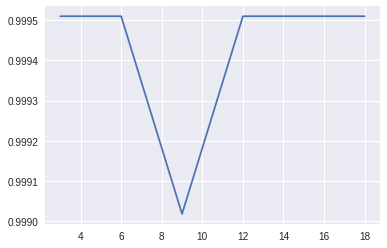

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save(model_name)


In [0]:
learn.export(model_name + '.pkl')


## Rerun Stage 2 with lower epochs

In [0]:
stage1_model_name = dataset + '-stage1b-resnet34-fp32-lr3e5-bs4096-sz28-cycle3'
learn.load(stage1_model_name);

In [0]:
epochs = 3
max_lr = slice(1e-6,3e-5)

model_name = dataset + '-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle3'


In [0]:
learn.fit_one_cycle(epochs, max_lr=max_lr)


epoch,train_loss,valid_loss,accuracy,time
0,0.004830,0.003118,0.999509,00:19
1,0.004335,0.002935,0.999509,00:20
2,0.004078,0.003007,0.999019,00:20


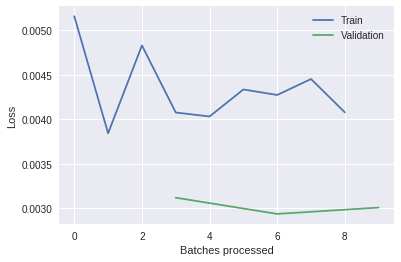

In [0]:
learn.recorder.plot_losses()

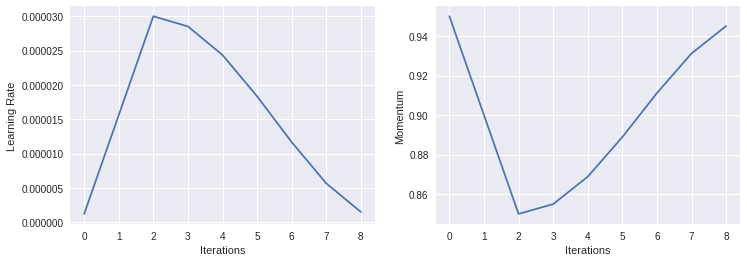

In [0]:
learn.recorder.plot_lr(show_moms=True)

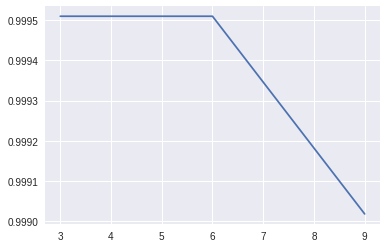

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save(model_name)


In [0]:
learn.export(model_name + '.pkl')


## Rerun Stage 2 with 2 epochs

In [0]:
stage1_model_name = dataset + '-stage1b-resnet34-fp32-lr3e5-bs4096-sz28-cycle3'
learn.load(stage1_model_name);

In [0]:
epochs = 2
max_lr = slice(1e-6,3e-5)

model_name = dataset + '-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle2'


In [0]:
learn.fit_one_cycle(epochs, max_lr=max_lr)


epoch,train_loss,valid_loss,accuracy,time
0,0.003284,0.003093,0.999509,00:21
1,0.003051,0.002939,0.999509,00:20


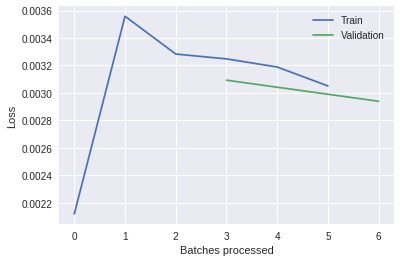

In [0]:
learn.recorder.plot_losses()

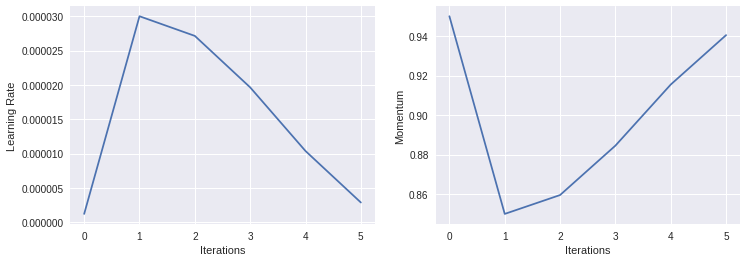

In [0]:
learn.recorder.plot_lr(show_moms=True)

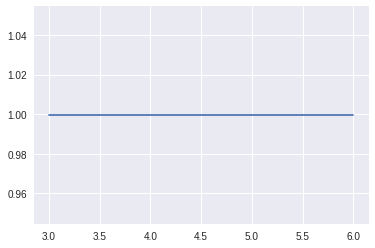

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save(model_name)


In [0]:
learn.export(model_name + '.pkl')


# Backup Models and Inference Models to GDrive

In [0]:
model_files = (path/'models').ls();model_files

[PosixPath('/root/.fastai/data/mnist_sample/models/mnist-sample-stage1-resnet34-fp32-lr1e2-bs4096-sz28-cycle3.pth'),
 PosixPath('/root/.fastai/data/mnist_sample/models/mnist-sample-stage2-resnet34-fp32-lrs1e6s8e4-bs4096-sz28-cycle2.pth'),
 PosixPath('/root/.fastai/data/mnist_sample/models/mnist-sample-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle3.pth'),
 PosixPath('/root/.fastai/data/mnist_sample/models/mnist-sample-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle6.pth'),
 PosixPath('/root/.fastai/data/mnist_sample/models/mnist-sample-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle2.pth'),
 PosixPath('/root/.fastai/data/mnist_sample/models/mnist-sample-stage1a-resnet34-fp32-lr5e4-bs4096-sz28-cycle3.pth'),
 PosixPath('/root/.fastai/data/mnist_sample/models/tmp.pth'),
 PosixPath('/root/.fastai/data/mnist_sample/models/mnist-sample-stage1b-resnet34-fp32-lr3e5-bs4096-sz28-cycle3.pth')]

In [0]:
model_files[6]

PosixPath('/root/.fastai/data/mnist_sample/models/tmp.pth')

In [0]:
!cp {model_files[0].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {model_files[1].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {model_files[2].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {model_files[3].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {model_files[4].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {model_files[5].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {model_files[7].as_posix()} {escdrive(gdrive/'models')}

In [0]:
pkl_files = list(path.glob('**/*.pkl'));pkl_files

[PosixPath('/root/.fastai/data/mnist_sample/mnist-sample-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle2.pkl'),
 PosixPath('/root/.fastai/data/mnist_sample/mnist-sample-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle6.pkl'),
 PosixPath('/root/.fastai/data/mnist_sample/mnist-sample-stage2-resnet34-fp32-lrs1e6s8e4-bs4096-sz28-cycle2.pkl'),
 PosixPath('/root/.fastai/data/mnist_sample/mnist-sample-stage1a-resnet34-fp32-lr5e4-bs4096-sz28-cycle3.pkl'),
 PosixPath('/root/.fastai/data/mnist_sample/mnist-sample-stage2a-resnet34-fp32-lrs1e6s3e5-bs4096-sz28-cycle3.pkl'),
 PosixPath('/root/.fastai/data/mnist_sample/mnist-sample-stage1b-resnet34-fp32-lr3e5-bs4096-sz28-cycle3.pkl')]

In [0]:
!cp {pkl_files[0].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {pkl_files[1].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {pkl_files[2].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {pkl_files[3].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {pkl_files[4].as_posix()} {escdrive(gdrive/'models')}

In [0]:
!cp {pkl_files[5].as_posix()} {escdrive(gdrive/'models')}